## <span style='color:blue'>GRAIL INSIGHTS SENIOR ANALYST DATA SCIENCE ASSIGNMENT</span>

### KAGGLE DATASET - CREDIT CARD FRAUD DETECTION

***
***

### <span style = 'color:blue'>1. IMPORTING ALL THE RELEVANT LIBRARIES</span>

In [453]:
import pandas as pd # Includes functions required for data wrangling
import numpy as np # Includes functions required to deal with numpy arrays 
import matplotlib.pyplot as plt  #Contains all the relevant functions for data visualisation
import seaborn as sns # Contains all the relevant functions for data visualisation

from sklearn.model_selection import train_test_split # Required to split data into training and test sets

from sklearn.naive_bayes import GaussianNB # Naive Bayes Classifier
from sklearn.linear_model import LogisticRegression # Logistic Regression Classifier
from sklearn.ensemble import RandomForestClassifier # Random Forest Classifier
from sklearn.tree import DecisionTreeClassifier # Decision Tree Classifier
from sklearn.neighbors import KNeighborsClassifier # K earest Neighbors

#The below two libraries facilitate model comparison by generating classification reports and metrics
from sklearn.metrics import classification_report 
from sklearn.metrics import accuracy_score, confusion_matrix

from imblearn.under_sampling import NearMiss,CondensedNearestNeighbour # Used for Under Sampling
from sklearn.model_selection import cross_val_score # Used to calculate cross validation score
from sklearn.model_selection import GridSearchCV #Used for Hyperparameter tuning
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score


import pickle # used to maintain program state across sessions
import time # required to measure execution time of models and choose appropriate model accordingly
import warnings
import os # Includes system level functions
warnings.filterwarnings('ignore')

### <span style = 'color:blue'>2. LOADING THE DATASET INTO MEMORY</span>

In [4]:
file_path = os.getcwd() + "\\creditcard.csv" #Define the path of the dataset
Master_df = pd.read_csv(file_path)
Master_df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [8]:
print("The given dataset has {} rows and {} columns".format(Master_df.shape[0],Master_df.shape[1]))

The given dataset has 284807 rows and 31 columns


In [51]:
for i in Master_df.columns:
    print("The number of null values in column {} is {}".format(i,sum(Master_df[i].isnull())))

The number of null values in column Time is 0
The number of null values in column V1 is 0
The number of null values in column V2 is 0
The number of null values in column V3 is 0
The number of null values in column V4 is 0
The number of null values in column V5 is 0
The number of null values in column V6 is 0
The number of null values in column V7 is 0
The number of null values in column V8 is 0
The number of null values in column V9 is 0
The number of null values in column V10 is 0
The number of null values in column V11 is 0
The number of null values in column V12 is 0
The number of null values in column V13 is 0
The number of null values in column V14 is 0
The number of null values in column V15 is 0
The number of null values in column V16 is 0
The number of null values in column V17 is 0
The number of null values in column V18 is 0
The number of null values in column V19 is 0
The number of null values in column V20 is 0
The number of null values in column V21 is 0
The number of null

#### Till this point, we've loaded the dataset into memory and identified the number of rows and columns
#### We've also identified that no column of the dataset has any null values

### <span style = 'color:blue'>2. EXPLORATORY DATA ANALYSIS AND DATA CLEANING</span>

<b>In this section we'll try to understand the Data better. We'll perform analyses to identify outliers, determine the descriptive statistics of every feature, check the class balance and identify relevant columns. Post this exercise we'll take remedial actions if required to clean the data for modelling.</b>

Text(0.5, 1.0, 'Class Distribution')

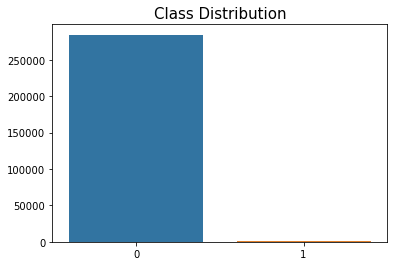

In [89]:
Class_x = Master_df['Class'].value_counts().index
Class_y = Master_df['Class'].value_counts().values

ax = sns.barplot(Class_x, Class_y)
ax.set_title("Class Distribution", fontsize=15)


In [101]:
print("The percentage of class 0 values in the dataset are {} %".format(100*round(sum(Master_df['Class']==0)/Master_df.shape[0],4)))
print("The percentage of class 1 values in the dataset are {} %".format(100*round(sum(Master_df['Class']==1)/Master_df.shape[0],4)))

The percentage of class 0 values in the dataset are 99.83 %
The percentage of class 1 values in the dataset are 0.16999999999999998 %


<b>We observe from here that our classes are highly unbalanced with only ~0.17% of the total values being 1</b>

In [17]:
Master_df.describe() # This function gives the descriptive statistics of every feature in the dataset

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


<b>The scientific notations in the description above make it very hard to comprehend. We'll try to suppress the notation</b>

In [53]:
Master_df.describe().apply(lambda s: s.apply(lambda x: format(x, 'f')))

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,...,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000
mean,94813.859575,0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000,-0.000000,-0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000,88.349619,0.001727
std,47488.145955,1.958696,1.651309,1.516255,1.415869,1.380247,1.332271,1.237094,1.194353,1.098632,...,0.734524,0.725702,0.624460,0.605647,0.521278,0.482227,0.403632,0.330083,250.120109,0.041527
min,0.000000,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-43.557242,-73.216718,-13.434066,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,0.000000,0.000000
25%,54201.500000,-0.920373,-0.598550,-0.890365,-0.848640,-0.691597,-0.768296,-0.554076,-0.208630,-0.643098,...,-0.228395,-0.542350,-0.161846,-0.354586,-0.317145,-0.326984,-0.070840,-0.052960,5.600000,0.000000
50%,84692.000000,0.018109,0.065486,0.179846,-0.019847,-0.054336,-0.274187,0.040103,0.022358,-0.051429,...,-0.029450,0.006782,-0.011193,0.040976,0.016594,-0.052139,0.001342,0.011244,22.000000,0.000000
75%,139320.500000,1.315642,0.803724,1.027196,0.743341,0.611926,0.398565,0.570436,0.327346,0.597139,...,0.186377,0.528554,0.147642,0.439527,0.350716,0.240952,0.091045,0.078280,77.165000,0.000000
max,172792.000000,2.454930,22.057729,9.382558,16.875344,34.801666,73.301626,120.589494,20.007208,15.594995,...,27.202839,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,25691.160000,1.000000


In [54]:
#In the following code snippet we're further colour coding the descriptive statistic values to make identification of very
#different metrics easier

Master_df.describe().T.style.bar(
subset=['mean'],color='#205fA3').background_gradient(
subset=['std'], cmap='autumn').background_gradient(
subset=['min'], cmap='terrain_r').background_gradient(
subset=['max'], cmap='brg').background_gradient(subset=['50%'], cmap='cool')

,count,mean,std,min,25%,50%,75%,max
Time,284807.000000,94813.859575,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.000000,0.000000,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.000000,0.000000,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.000000,-0.000000,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.000000,0.000000,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.000000,-0.000000,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.000000,0.000000,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.000000,-0.000000,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.000000,-0.000000,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.000000,-0.000000,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


<b>We observe that with the exception of Time and Amount, all other independent variables have mean = 0 and standard deviation between 0 and 2. Also the range of the values of V1 to V28 columns is nearly the same.</b>

<b>In order to run the Machine Learning Algorithms effectively, we'll need to scale the features. We can either use Standardisation or Normalisation. However both these techniques have their pros and cons -

1. Standardisation is helpful when the data follows a Gaussian Distribution. Also Standardisation is not affected by outliers
2. Normalisation is helpful when the data follows a non Gaussian Distribution. This technique is very sensitive to outliers

We'll be scaling only the Amount and Time attributes since their scale is vastly different from V1 - V28</b>

(0.0, 172792.0)

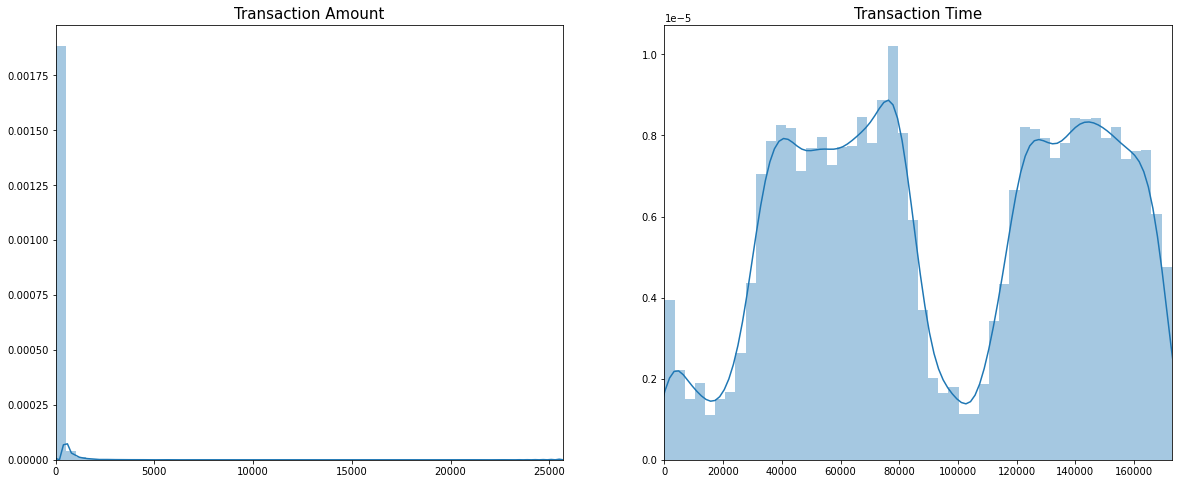

In [69]:
#Checking for the distribution of Amount and Time attributes

fig, ax = plt.subplots(1,2, figsize=(20,8))
df_amt = Master_df['Amount'].values
df_time = Master_df['Time'].values

sns.distplot(df_amt, ax=ax[0])
ax[0].set_title("Transaction Amount", fontsize=15)
ax[0].set_xlim(min(df_amt), max(df_amt))
sns.distplot(df_time, ax=ax[1])
ax[1].set_title("Transaction Time", fontsize=15)
ax[1].set_xlim(min(df_time), max(df_time))

<b>We notice that both the Amount distribution is heavily skewed. We'll try to fix this first</b>

In [157]:
Time_values = Master_df['Time']
Amt_values = Master_df['Amount']

<b>Since the Transaction Amounts are heavily skewed towards the left, we'll try to take a natural logarithm and observe the distribution</b>

(0.0, 25691.16)

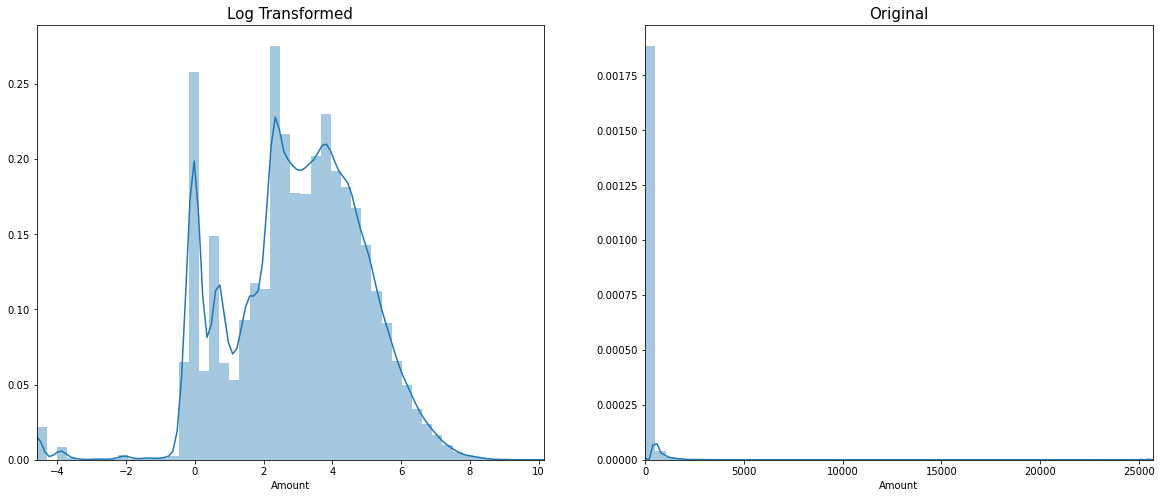

In [158]:
Amt_log = np.log(0.01+Amt_values) # here we're adding a very small amount 0.01 to every entry since some values are 0 and logarithm of 0 is not defined

fig, ax = plt.subplots(1,2, figsize=(20,8))

sns.distplot(Amt_log, ax=ax[0])
ax[0].set_title("Log Transformed", fontsize=15)
ax[0].set_xlim(min(Amt_log), max(Amt_log))
sns.distplot(Amt_values, ax=ax[1])
ax[1].set_title("Original", fontsize=15)
ax[1].set_xlim(min(Amt_values), max(Amt_values))


<b>We observe here that after taking a log transformation, the Amount column distribution is less skewed. We'll thus tranform the Amount column by taking a natural logarithm</b>

In [153]:
Master_df_log_transformed = Master_df.copy()
Master_df_log_transformed['Amount'] = np.log(0.01 + Master_df_log_transformed['Amount'])

<b>We'll now apply normalisation to Time and Amount columns</b>

In [164]:
Master_df_normalised = Master_df_log_transformed.copy()
Master_df_normalised['Amount'] = (Master_df_normalised['Amount'] - min(Master_df_normalised['Amount']))/(max(Master_df_normalised['Amount'])-min(Master_df_normalised['Amount']))
Master_df_normalised['Time'] = (Master_df_normalised['Time'] - min(Master_df_normalised['Time']))/(max(Master_df_normalised['Time'])-min(Master_df_normalised['Time']))

In [177]:
Master_df_normalised.loc[:,['Time','Amount']].describe().apply(lambda s: s.apply(lambda x: format(x, 'f')))

,Time,Amount
count,284807.000000,284807.000000
mean,0.548717,0.512602
std,0.274828,0.132175
min,0.000000,0.000000
25%,0.313681,0.428870
50%,0.490138,0.521487
75%,0.806290,0.606491
max,1.000000,1.000000


As we can see, the Time and Amount columns have been Normalised

The next step is to try and create a balance between the classes. Since this dataset is heavily imbalanced, we'll <b>Undersample</b> the majority class to bring down its rows equal to the minority class

<b>One way is to randomly delete the rows of majority class to ensure that the same number of majority and inority classes remain.
However, this may lead to loss of important data which might be useful in making predictions.

So we'll be using a technique called <span style = 'color:blue'><b>Near Miss Undersampling</b></span>

This technique selects specific rows of the majority class to keep and deletes the rest. The algorithm is such that only those rows of the majority class which are contributing the most to the distinction between output classes remain and the rest get deleted.

There are three versions of the technique, named NearMiss-1, NearMiss-2, and NearMiss-3

<span style = 'color:blue'>NearMiss-1</span> selects examples from the majority class that have the smallest average distance to the three closest examples from the minority class.

<span style = 'color:blue'>NearMiss-2</span> selects examples from the majority class that have the smallest average distance to the three furthest examples from the minority class.

<span style = 'color:blue'>NearMiss-3</span> involves selecting a given number of majority class examples for each example in the minority class that are closest.

Here, distance is determined in feature space using Euclidean distance or similar.</b>

In the following section we'll apply all 3 appropaches and plot the output class with respect to the first two independent variables (Since we cannot graph out the output with respect to all dimensions of independent variables in 3 dimensions)

In [226]:
from collections import Counter

X = Master_df_normalised.iloc[:,:-1] #this variable contains all the features (feature matrix)
Y = Master_df_normalised.iloc[:,-1]  #this variable is the target variables (class)

undersample_1 = NearMiss(version=1, n_neighbors=3) #NearMiss 1
undersample_2 = NearMiss(version=2, n_neighbors=3) #NearMiss 2
undersample_3 = NearMiss(version=3, n_neighbors=3) #NearMiss 3

# transform the dataset
X_fit_1, Y_fit_1 = undersample_1.fit_resample(X, Y)
X_fit_2, Y_fit_2 = undersample_2.fit_resample(X, Y)
X_fit_3, Y_fit_3 = undersample_3.fit_resample(X, Y)

# summarize the new class distribution
counter1 = Counter(Y_fit_1)
counter2 = Counter(Y_fit_2)
counter3 = Counter(Y_fit_3)

print("The distribution of classes after applying NearMiss1 strategy is 0 : {} and 1 : {} ".format(counter1[0],counter1[1]))
print("The distribution of classes after applying NearMiss2 strategy is 0 : {} and 1 : {} ".format(counter2[0],counter2[1]))
print("The distribution of classes after applying NearMiss3 strategy is 0 : {} and 1 : {} ".format(counter3[0],counter3[1]))

The distribution of classes after applying NearMiss1 strategy is 0 : 492 and 1 : 492 
The distribution of classes after applying NearMiss2 strategy is 0 : 492 and 1 : 492 
The distribution of classes after applying NearMiss3 strategy is 0 : 403 and 1 : 492 


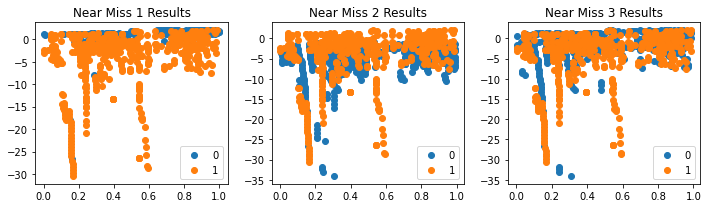

In [247]:
# scatter plot of examples by class label
fig = plt.figure(figsize=(10,3))


ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)

from numpy import where
for label, _ in counter1.items():
    row_ix_1 = where(Y_fit_1 == label)[0]
    row_ix_2 = where(Y_fit_2 == label)[0]
    row_ix_3 = where(Y_fit_3 == label)[0]
    
    #plotting the output w.r.t first two features
    ax1.scatter(X_fit_1.iloc[row_ix_1, 0], X_fit_1.iloc[row_ix_1, 1], label=str(label)) 
    ax2.scatter(X_fit_2.iloc[row_ix_2, 0], X_fit_2.iloc[row_ix_2, 1], label=str(label))
    ax3.scatter(X_fit_3.iloc[row_ix_3, 0], X_fit_3.iloc[row_ix_3, 1], label=str(label))
    
ax1.legend()
ax2.legend()
ax3.legend()

ax1.set_title("Near Miss 1 Results")
ax2.set_title("Near Miss 2 Results")
ax3.set_title("Near Miss 3 Results")

fig.tight_layout()

fig.show()

<b>Since Near Miss 3 does not create an equal balance between class 0 and class 1, we'll go ahead with Near Miss 1 as it has less overlap between classes as compared to Near Miss 2</b>

In [249]:
df_undersampled = pd.concat([X_fit_1,Y_fit_1],axis=1) #creating a new dataframe with undersampled values from Near Miss 1
df_undersampled['Class'].value_counts()

1    492
0    492
Name: Class, dtype: int64

<b>We've now obtained the new undersampled dataset</b>

<b>Let's now look at the correlation matrix before and after undersampling</b>

Text(0.5, 1.0, 'Correlation before undersampling')

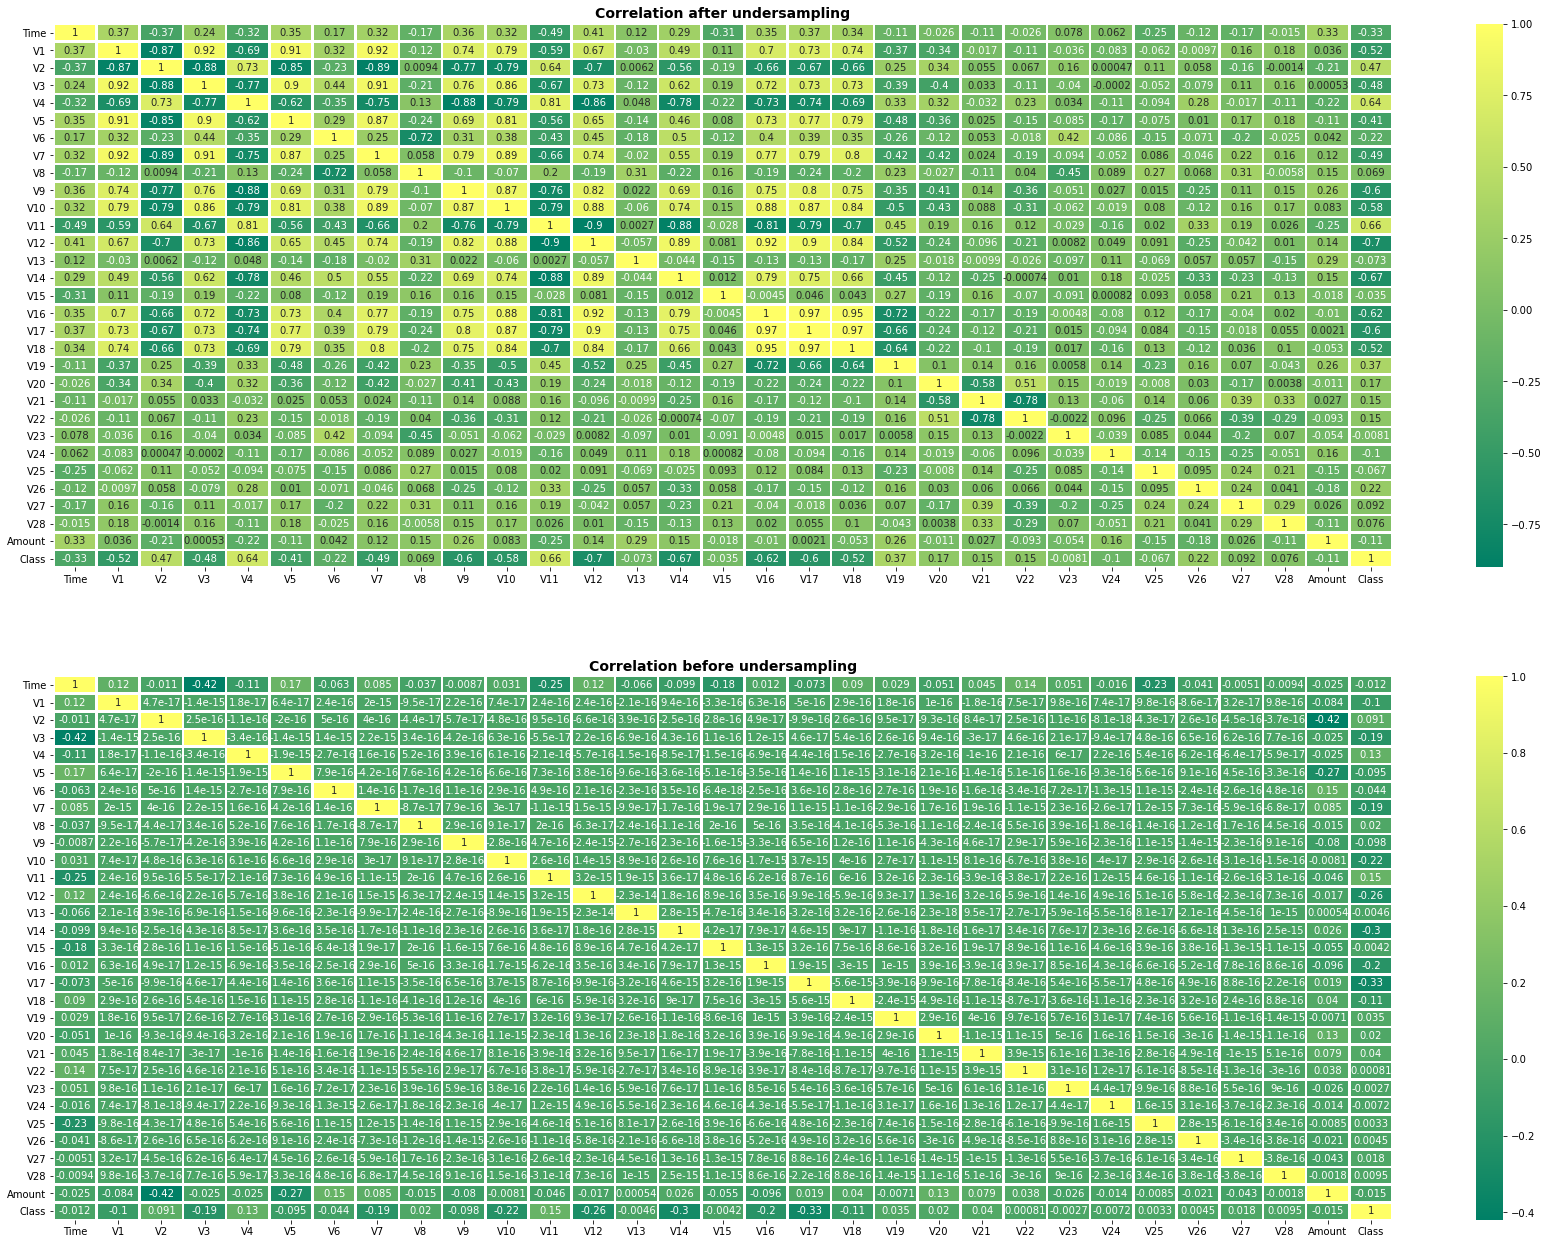

In [253]:
f, (ax1, ax2) = plt.subplots(2,1 ,figsize=(30,22))

sns.heatmap(df_undersampled.corr(), ax=ax1, cmap='summer',annot=True, linewidths=1.5)
ax1.set_title("Correlation after undersampling",fontsize=14, fontweight='bold')
sns.heatmap(Master_df_normalised.corr(), ax=ax2, cmap='summer',annot=True, linewidths=1.5)
ax2.set_title("Correlation before undersampling",fontsize=14, fontweight='bold')

<b>We observe that the correlation among features after undersampling has slightly increased.</b>

In [322]:
df_undersampled = df_undersampled.sample(frac=1).reset_index(drop=True) # Shuffling the dataset so that all similar are not together 

### <span style = 'color:blue'>3. MODEL BUILDING</span>

<b>In this section we'll be building the following Machine Learning Models - 

1. Logistic Regression
2. Decision Trees
3. Random Forest
4. Naive Bayes
5. K Nearest Neighbors

Additionally we'll use gridsearch to find the optimum value of hyperparameters for each of the aforementioned models and compare the results based on precision,recall,accuracy and AUC ROC Curve.</b>


In [324]:
X_final = df_undersampled.iloc[:,:-1]
Y_final = df_undersampled.iloc[:,-1]

X_train,X_test,Y_train,Y_test = train_test_split(X_final,Y_final,test_size=0.3)

***

<b>1. Logistic Regression

Hyperparameters that could be tuned -

a) penalty : norm used in the penalization

b) C : inverse of regularisation strength
</b>

In [365]:
clf_LR = LogisticRegression(penalty='l1',C=1,solver='liblinear',max_iter=500,n_jobs=-1)
clf_LR.fit(X_train,Y_train)

LogisticRegression(C=1, max_iter=500, n_jobs=-1, penalty='l1',
                   solver='liblinear')

<b>Now that we've fit the our model on our training set, we'll calculate the accuracy on training and test sets</b>

In [366]:
print("The Accuracy of Logistic regression on training set is {} %".format(100*(sum(clf_LR.predict(X_train)==Y_train)/len(X_train))))
print("The Accuracy of Logistic regression on test set is {} %".format(100*(sum(clf_LR.predict(X_test)==Y_test)/len(X_test))))

The Accuracy of Logistic regression on training set is 96.22093023255815 %
The Accuracy of Logistic regression on test set is 95.27027027027027 %


<b>In our business problem however, we can't completely depend on the accuracy metric. It's because in our business problem, the cost associated with a <span style = 'color:blue'>False Negative</span> is very high. In other words, If a transaction is fraudulent, and our model predicts it as non fraudulent, it'll have serious repurcussions</b>

<b>So we'll try to maximise the <span style = 'color:blue'>Recall</span> here instead of accuracy since recall will capture how many true positives(in our case fraudulent transactions) out of total actual positives are predicted by our model</b>

<b>Let's see if hyperparameter tuning can improve the recall</b>

In [375]:
parameters = {'penalty':('l1','l2'),'C':[0.01,0.1,1,10,50,100,500,1000]}
GCV_LR = GridSearchCV(clf_LR, parameters,scoring='recall',verbose=1)
GCV_LR.fit(X_train, Y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(estimator=LogisticRegression(C=1, max_iter=500, n_jobs=-1,
                                          penalty='l1', solver='liblinear'),
             param_grid={'C': [0.01, 0.1, 1, 10, 50, 100, 500, 1000],
                         'penalty': ('l1', 'l2')},
             scoring='recall', verbose=1)

In [376]:
GCV_LR.best_params_

{'C': 100, 'penalty': 'l1'}

In [377]:
print(classification_report(Y_test,GCV_LR.predict(X_test)))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       150
           1       0.97      0.95      0.96       146

    accuracy                           0.96       296
   macro avg       0.96      0.96      0.96       296
weighted avg       0.96      0.96      0.96       296



Here the recall of class 1 which we're concerned with is 95%

<b>We'll now plot the ROC curve and calculate AUC to obtain an overall summary of the model performance</b>

In [408]:
def plot_roc_curve(X_test,Y_test,model,title,model_name):
    
    ns_probs = [0 for _ in range(len(X_test))]
    lr_probs = model.predict_proba(X_test)
    # keep probabilities for the positive outcome only
    lr_probs = lr_probs[:, 1]
    # calculate scores
    ns_auc = roc_auc_score(Y_test, ns_probs)
    lr_auc = roc_auc_score(Y_test, lr_probs)
    # summarize scores
    print('No Skill: ROC AUC={}'.format(ns_auc))
    print('{}: ROC AUC={}'.format(model_name,lr_auc))
    # calculate roc curves
    ns_fpr, ns_tpr, _ = roc_curve(Y_test, ns_probs)
    lr_fpr, lr_tpr, _ = roc_curve(Y_test, lr_probs)
    # plot the roc curve for the model
    plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
    plt.plot(lr_fpr, lr_tpr, marker='.', label=model_name)
    # axis labels
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    # show the legend
    plt.legend()
    plt.title(title)
    # show the plot
    plt.show()

No Skill: ROC AUC=0.5
Logistic: ROC AUC=0.9775342465753425


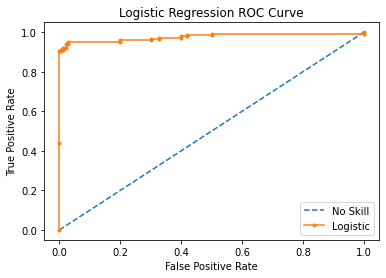

In [400]:
plot_roc_curve(X_test,Y_test,GCV_LR,"Logistic Regression ROC Curve","Logistic")

***

<b>2. Decision Trees

Hyperparameters that could be tuned -

a) Criterion (Gini or Entropy) : to measure the quality of a split

b) max_depth : The maximum depth of the tree

c) max_features : The number of features to consider when looking for the best split</b>

In [383]:
clf_DT = DecisionTreeClassifier(criterion='gini',max_depth=None,max_features=None)
clf_DT.fit(X_train,Y_train)

DecisionTreeClassifier()

In [384]:
print("The Accuracy of Decision Tree on training set is {} %".format(100*(sum(clf_DT.predict(X_train)==Y_train)/len(X_train))))
print("The Accuracy of Decision Tree on test set is {} %".format(100*(sum(clf_DT.predict(X_test)==Y_test)/len(X_test))))

The Accuracy of Decision Tree on training set is 100.0 %
The Accuracy of Decision Tree on test set is 97.63513513513513 %


Although this Accuracy is pretty good, we still have to look at recall

In [394]:
parameters_DT = {'criterion':('gini','entropy'),'max_depth':[10,9,8,7,6,5],'max_features':[10,9,8,7,6,5,4]}
GCV_DT = GridSearchCV(clf_DT, parameters_DT,scoring='recall',verbose=1)
GCV_DT.fit(X_train, Y_train)

Fitting 5 folds for each of 84 candidates, totalling 420 fits


GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ('gini', 'entropy'),
                         'max_depth': [10, 9, 8, 7, 6, 5],
                         'max_features': [10, 9, 8, 7, 6, 5, 4]},
             scoring='recall', verbose=1)

In [395]:
GCV_DT.best_params_

{'criterion': 'entropy', 'max_depth': 7, 'max_features': 10}

In [396]:
print(classification_report(Y_test,GCV_DT.predict(X_test)))

              precision    recall  f1-score   support

           0       0.96      0.97      0.97       150
           1       0.97      0.96      0.97       146

    accuracy                           0.97       296
   macro avg       0.97      0.97      0.97       296
weighted avg       0.97      0.97      0.97       296



Here the recall of class 1 which we're concerned with is 96%

No Skill: ROC AUC=0.5
Decision Tree: ROC AUC=0.964566210045662


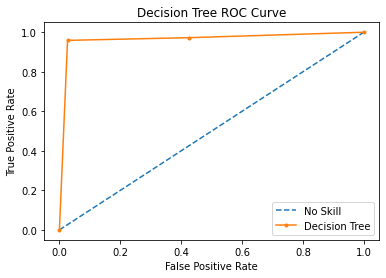

In [409]:
plot_roc_curve(X_test,Y_test,GCV_DT,"Decision Tree ROC Curve","Decision Tree")

<b>3. Random Forest

Hyperparameters that could be tuned -

a) n_estimators : Number of trees in the forest

a) Criterion (Gini or Entropy) : to measure the quality of a split

b) max_depth (The maximum depth of the tree)

c) max_features (The number of features to consider when looking for the best split)</b>

In [402]:
clf_RF = RandomForestClassifier(n_estimators = 100,criterion='gini',max_depth=None,max_features=None)
clf_RF.fit(X_train,Y_train)

RandomForestClassifier(max_features=None)

In [403]:
print("The Accuracy of Random Forest on training set is {} %".format(100*(sum(clf_RF.predict(X_train)==Y_train)/len(X_train))))
print("The Accuracy of Random Forest on test set is {} %".format(100*(sum(clf_RF.predict(X_test)==Y_test)/len(X_test))))

The Accuracy of Random Forest on training set is 100.0 %
The Accuracy of Random Forest on test set is 97.97297297297297 %


In [404]:
parameters_RF = {'n_estimators':[5,25,50,75,100],'criterion':('gini','entropy'),'max_depth':[10,9,8,7,6,5],'max_features':[10,9,8,7,6,5,4]}
GCV_RF = GridSearchCV(clf_RF, parameters_RF,scoring='recall',verbose=1)
GCV_RF.fit(X_train, Y_train)

Fitting 5 folds for each of 420 candidates, totalling 2100 fits


GridSearchCV(estimator=RandomForestClassifier(max_features=None),
             param_grid={'criterion': ('gini', 'entropy'),
                         'max_depth': [10, 9, 8, 7, 6, 5],
                         'max_features': [10, 9, 8, 7, 6, 5, 4],
                         'n_estimators': [5, 25, 50, 75, 100]},
             scoring='recall', verbose=1)

In [405]:
GCV_RF.best_params_

{'criterion': 'gini', 'max_depth': 9, 'max_features': 9, 'n_estimators': 5}

In [406]:
print(classification_report(Y_test,GCV_RF.predict(X_test)))

              precision    recall  f1-score   support

           0       0.97      0.98      0.97       150
           1       0.98      0.97      0.97       146

    accuracy                           0.97       296
   macro avg       0.97      0.97      0.97       296
weighted avg       0.97      0.97      0.97       296



No Skill: ROC AUC=0.5
Random Forest: ROC AUC=0.9872146118721461


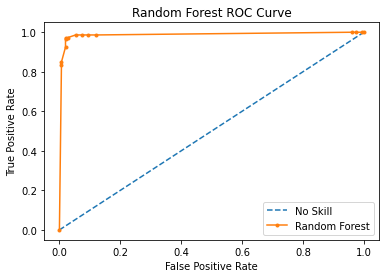

In [410]:
plot_roc_curve(X_test,Y_test,GCV_RF,"Random Forest ROC Curve","Random Forest")

<b>4. K Nearest Neighbors

Hyperparameters that could be tuned -

a) n_neighbors : Number of neighbors to use

a) p : Power parameter for the Minkowski metric (manhattan or euclidean distance) </b>


In [415]:
clf_KN = KNeighborsClassifier(n_neighbors=5,p=2)
clf_KN.fit(X_train,Y_train)

KNeighborsClassifier()

In [416]:
print("The Accuracy of K nearest neighbors on training set is {} %".format(100*(sum(clf_KN.predict(X_train)==Y_train)/len(X_train))))
print("The Accuracy of K Nearest Neighbors on test set is {} %".format(100*(sum(clf_KN.predict(X_test)==Y_test)/len(X_test))))

The Accuracy of K nearest neighbors on training set is 94.76744186046511 %
The Accuracy of K Nearest Neighbors on test set is 94.93243243243244 %


In [417]:
parameters_KN = {'n_neighbors':[2,5,10,15,20],'p':[1,2]}
GCV_KN = GridSearchCV(clf_KN, parameters_KN,scoring='recall',verbose=1)
GCV_KN.fit(X_train, Y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [2, 5, 10, 15, 20], 'p': [1, 2]},
             scoring='recall', verbose=1)

In [418]:
GCV_KN.best_params_

{'n_neighbors': 5, 'p': 2}

In [419]:
print(classification_report(Y_test,GCV_KN.predict(X_test)))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95       150
           1       1.00      0.90      0.95       146

    accuracy                           0.95       296
   macro avg       0.95      0.95      0.95       296
weighted avg       0.95      0.95      0.95       296



No Skill: ROC AUC=0.5
K nearest neighbors: ROC AUC=0.9761643835616437


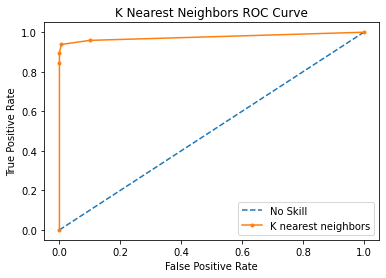

In [420]:
plot_roc_curve(X_test,Y_test,GCV_KN,"K Nearest Neighbors ROC Curve","K nearest neighbors")

<b>4. Naive Bayes

No hyperparameters to be tuned for Naive Bayes</b>

In [422]:
clf_NB = GaussianNB()
clf_NB.fit(X_train,Y_train)

GaussianNB()

In [423]:
print("The Accuracy of Naive Bayes on training set is {} %".format(100*(sum(clf_NB.predict(X_train)==Y_train)/len(X_train))))
print("The Accuracy of Naive Bayes on test set is {} %".format(100*(sum(clf_NB.predict(X_test)==Y_test)/len(X_test))))

The Accuracy of Naive Bayes on training set is 92.87790697674419 %
The Accuracy of Naive Bayes on test set is 94.93243243243244 %


In [424]:
print(classification_report(Y_test,clf_NB.predict(X_test)))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95       150
           1       1.00      0.90      0.95       146

    accuracy                           0.95       296
   macro avg       0.95      0.95      0.95       296
weighted avg       0.95      0.95      0.95       296



No Skill: ROC AUC=0.5
Naive Bayes: ROC AUC=0.9900913242009132


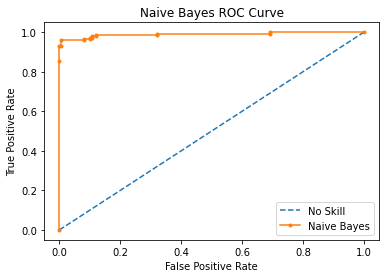

In [425]:
plot_roc_curve(X_test,Y_test,clf_NB,"Naive Bayes ROC Curve","Naive Bayes")

***

### <span style = 'color:blue'>4. ATTRIBUTE IMPORTANCE AND RESULT INFERENCE</span>

<b> In this section we'll attempt to understand the relative importance of the features in explaining the result variation</b>

<b>Since Grid Search CV Objects don't have this feature, we'll use the Random Forest classifier object to obtain these results</b>

In [469]:
imp_dict = {}
for i in range(X_train.shape[1]):
    imp_dict[X_train.columns[i]] = clf_RF.feature_importances_[i]

In [470]:
imp_list = [[i,imp_dict[i]] for i in imp_dict]

Text(0, 0.5, 'Importance')

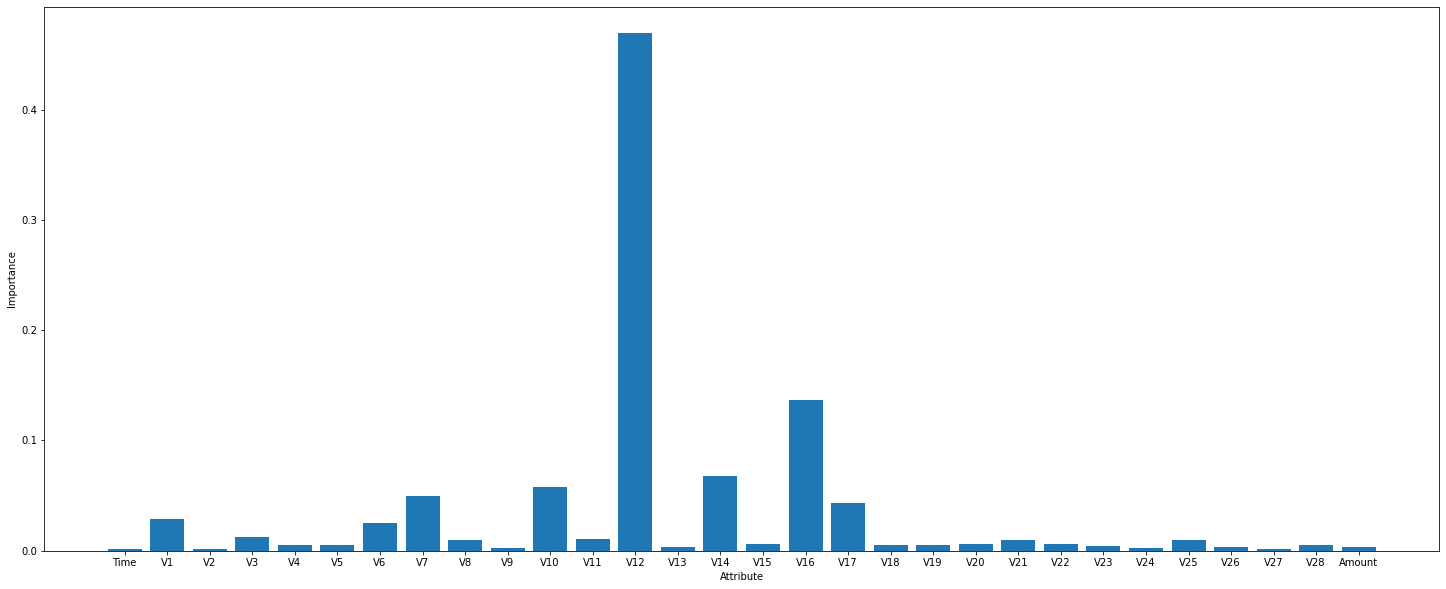

In [478]:
imp_list
X_values = [x[0] for x in imp_list]
Y_values = [y[1] for y in imp_list]
plt.figure(figsize=(25,10))
plt.bar(X_values,Y_values)
plt.xlabel("Attribute")
plt.ylabel("Importance")

<b>As is evident, the Amount and Time attributes actually Don't contribute much to the explanation of variation in the dataset.
Only around 8 attributes (V12,V16,V14,V10,V7,V17,V6,V1) actually contribute substantially to the variance</b>

### <span style = 'color:blue'>5. MODEL COMPARISON AND SELECTION</span>

Given below are the results of the models ran on the test data

| Model Name | AUC-ROC | Accuracy | Precision on 0 | Precision on 1 | Recall on 0 | Recall on 1|
| :-: | :-: | :-: | :-: | :-: | :-: | :-: |
| <span style = 'color:blue'>Logistic Regression</span> | 0.976 | 0.96 | 0.95 | 0.97 | 0.97 | 0.95 |
| <span style = 'color:blue'>Decision Tree</span> | 0.965 | 0.97 | 0.96 | 0.97 | 0.97 | 0.96 |
| <span style = 'color:blue'>Random Forest</span> | 0.987 | 0.97 | 0.97 | 0.98 | 0.98 | 0.97 |
| <span style = 'color:blue'>K Nearest Neighbor</span> | 0.976 | 0.95 | 0.91 | 1.00 | 1.00 | 0.90 |
| <span style = 'color:blue'>Naive Bayes</span> | 0.99 | 0.95 | 0.91 | 1.00 | 1.00 | 0.9 |

After the entire exercise, following are the inferences - 

1. Naive Bayes performs best in terms of Area under ROC curve

2. Decision Tree and Random Forest give the best accuracy

3. Random forest performs the best on precision for class 0

4. KNN and Naive Bayes have a perfect score of 100% on precision for class 1

5. KNN and Naive Bayes have a perfect score of 100% on recall for class 0

6. Random Forest performs best on recall for class 1

As Discussed earlier, our main focus should be to predict the fraudulent activities with
maximum accuracy (i.e recall on class 1)

We see that Random forest scores highest in terms of recall on class 1 and also has the second highest AUC ROC.

Hence <b>Random Forest</b> should be our choice of model for this dataset 

### <span style = 'color:blue'>6. APPENDIX </span>

<b>In order to further appreciate the advantage of undersampling, we'll attempt to run our Random Forest classifier on the original dataset before undersampling to gauge the results</b>

In [449]:
X_temp = Master_df_normalised.iloc[:,:-1]
Y_temp = Master_df_normalised.iloc[:,-1]

X_train_temp,X_test_temp,Y_train_temp,Y_test_temp = train_test_split(X_temp,Y_temp,test_size=0.3)

In [450]:
start = time.time()
clf_RF_temp = RandomForestClassifier(n_estimators = 5,criterion='gini',max_depth=9,max_features=9)
clf_RF_temp.fit(X_train_temp, Y_train_temp)
end = time.time()
print("The time required to execute the model is {} seconds".format(end-start))

The time required to execute the model is 10.446520328521729 seconds


In [451]:
print(classification_report(Y_test_temp,clf_RF_temp.predict(X_test_temp)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85276
           1       0.94      0.78      0.85       167

    accuracy                           1.00     85443
   macro avg       0.97      0.89      0.93     85443
weighted avg       1.00      1.00      1.00     85443



No Skill: ROC AUC=0.5
Random Forest: ROC AUC=0.9564197394413294


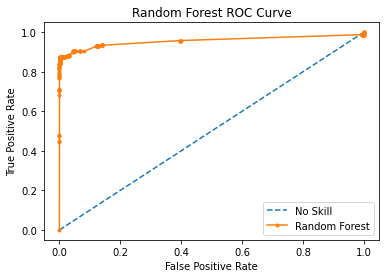

In [452]:
plot_roc_curve(X_test_temp,Y_test_temp,clf_RF_temp,"Random Forest ROC Curve","Random Forest")

<b>We can see that the performance metrics (especially recall on 1) are coming  out worse than what we got after undersampling. Also the execution time (~10.5 seconds) even without doing Grid Search is much higher than what we got with our undersampled dataset. Hence, our approach to obtain a balance between the output classes was justified. </b>